1. search_images (ddgs)
2. download images (fastcore?)
3. build dls (DataBlock(..).dataloaders(path))
4. build Learner
5. inference

In [3]:
!pip install -Uqq duckduckgo_search

In [4]:
from fastcore.all import * 
from duckduckgo_search import DDGS

In [9]:
def search_images(term, max_images=200):
    with DDGS(headers = {'Accept-Encoding': 'deflate, gzip, br'}) as ddgs:
        results = ddgs.images(keywords=term)
        images = [next(results).get("image") for _ in range(max_images)]
    return L(images)

In [13]:
img = search_images("cute dog", max_images=100)
img[0]

'http://www.cutenessoverflow.com/wp-content/uploads/2014/02/Little-Cute-Puppy-1600x1200.jpg'

In [18]:
from fastdownload import download_url
import os

download_url(url=img[0], dest='cute-dogs.jpg', show_progress=False)

Path('cute-dogs.jpg')

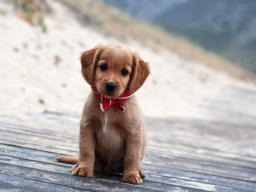

In [24]:
from fastai.vision.all import *

i = Image.open("cute-dog.jpg")
i.to_thumb(256)